In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [56]:
class Balls:
    
    def __init__(self, N, dim, boundary, T):
        
        self.N        = N
        self.T        = T
        self.dim      = dim
        self.boundary = boundary
        
        np.random.seed(0)
        self.pos = 2*np.random.rand(N,dim)-1
        
        np.random.seed(0)
        self.vel = 2*np.random.rand(N,dim)-1
        
        np.random.seed(0)
        self.rad = np.random.rand(N)
        
        self.tc      = []
        self.results = []
        
        self.tc_all = np.full((N,2*dim+N), float(T))
        
        return
        
    def move(self, dt):
        
        pos = self.pos
        vel = self.vel
        
        pos = pos + vel*dt
        
        self.pos = pos
        
        return
    
    def evolve(self):
        
        T         = self.T
        move      = self.move
        plot      = self.plot_results
        record    = self.record
        tc_min    = self.tc_min
        collide   = self.collide
        collide_b = self.collide_boundary
        
        t = 0
        dt = T
        record()
        
        while t < T:
    
            collide_b()
        
            tc_min()
                
            dt = self.tc[-1]
                
            move(dt)
            
            collide()
                
            t += dt
            
            record()
        
        plot()
        
        return
    
    def record(self):
        
        pos     = self.pos
        results = self.results
        
        results.append(pos)
        
        self.results = results
        
        return
    
    def plot_results(self):
        
        N        = self.N
        results  = np.array(self.results)
        boundary = self.boundary
        
        for i in range(N):
            
            plt.plot(results[:,i,0], results[:,i,1])
        
        plt.axis('square')
        plt.title(f'Collision with Particle Numbers = {N} and\nBoundary = {boundary}')
        plt.xlabel('X(m)')
        plt.ylabel('Y(m)')
        plt.savefig(f'N_{N}_particles_with_boundary.png')
        
        return

    def collide_boundary(self):
        
        T        = self.T
        dim      = self.dim
        pos      = self.pos
        vel      = self.vel
        boundary = self.boundary
        tc_all_b = self.tc_all[:,0:2*dim] # tc_all_boundary
    
        tc_all_b[:,0:dim]     = (boundary - pos)/vel
        tc_all_b[:,dim:2*dim] = (-boundary - pos)/vel
        tc_all_b[tc_all_b<=0] = T
        
        self.tc_all[:,0:2*dim] = tc_all_b
        
        return
    
    def tc_min(self):
        
        tc     = self.tc
        tc_all = self.tc_all
        
        tc.append(np.min(tc_all))
        
        self.tc              = tc
        self.collision_index = tc_all==np.min(tc_all)
        
        return
    
    def collide(self):
        
        dim   = self.dim
        vel   = self.vel
        index = self.collision_index
        
        vel[index[:,0:dim]]      = -vel[index[:,0:dim]]
        vel[index[:,dim:2*dim]]  = -vel[index[:,dim:2*dim]]
        
        self.vel = vel
    
        return


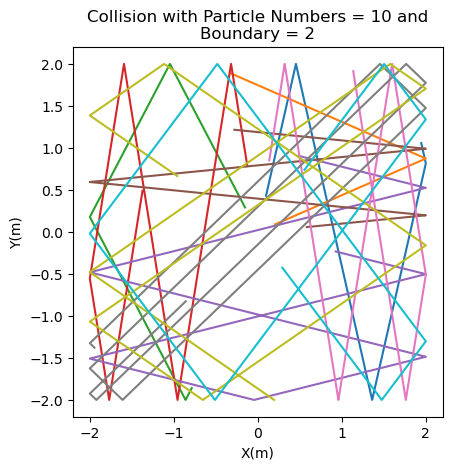

In [57]:
numbers  = 10                  # particle numbers
dim      = 2                   # dimension
boundary = 2                   # boundary
T        = 20                  # total time

balls = Balls(numbers, dim, boundary, T) # balls

balls.evolve()

0.393040120590462


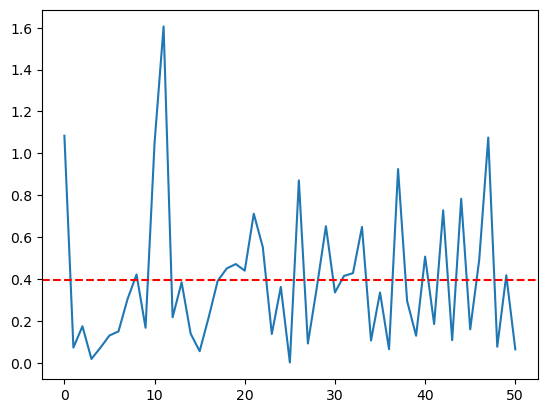

In [58]:
tc = balls.tc
plt.plot(tc)
print(np.sum(tc)/len(tc))
plt.axhline(y=np.sum(tc)/len(tc), color='r', linestyle='--')


In [59]:
r = np.array([[0,0],[1,0.4]])
v = np.array([[1,0],[0,0]])
R = np.array([0.2,0.2])

x = r[:,0]
y = r[:,1]

vx = v[:,0]
vy = v[:,1]

xi, xj = np.meshgrid(x,x,indexing='ij')
yi, yj = np.meshgrid(y,y,indexing='ij')

vxi, vxj = np.meshgrid(vx,vx,indexing='ij')
vyi, vyj = np.meshgrid(vy,vy,indexing='ij')

Ri, Rj = np.meshgrid(R,R,indexing='ij')

xij = xj - xi
yij = yj - yi

vxij = vxj - vxi
vyij = vyj - vyi

Rij = Rj + Ri

r_d_v  = xij*vxij + yij*vyij # r dot v
r_s    = xij**2 + yij**2     # r square
v_s    = vxij**2 + vyij**2   # v square
R_s    = Rij**2              # R square


T = np.full(r_s.shape,True)
T = np.triu(T, k=1) # upper triangle to speedup
D = r_d_v**2-v_s*(r_s-R_s)
J = T&(D>=0)

tc = np.zeros(Rij.shape)
tc[J] = (-r_d_v[J] - np.sqrt(D[J]))/v_s[J]
print(tc)

[[0. 1.]
 [0. 0.]]


In [60]:
v = np.array([1,0])
m = np.array([1,3])

vi, vj = np.meshgrid(v,v,indexing='ij')
mi, mj = np.meshgrid(m,m,indexing='ij')

vij = (vi*(mi-mj)+2*mj*vj)/(mi+mj)

print(vij)

[[ 1.  -0.5]
 [ 0.5  0. ]]
